In [1]:
#predicing flight satisfaction levels of customers

In [2]:
#it is a binary classification problem here we have to predict the satisfaction level of customers

In [53]:
#step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
train = pd.read_csv(r"C:\Users\parin\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\parin\Downloads\test.csv")

In [20]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [21]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [22]:
# as it is already splitted we will just preprocess the data now

In [23]:
train = train.dropna()
test = test.dropna()

In [24]:
# now we will encode evrything

In [28]:
train_encoded = pd.get_dummies(train, drop_first = True)


In [29]:
train_encoded

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0,70172,13,460,3,4,3,1,5,3,...,5,5,25,18.0,True,False,True,False,True,False
1,1,5047,25,235,3,2,3,3,1,3,...,4,1,1,6.0,True,True,False,False,False,False
2,2,110028,26,1142,2,2,2,2,5,5,...,4,5,0,0.0,False,False,False,False,False,True
3,3,24026,25,562,2,5,5,5,2,2,...,4,2,11,9.0,False,False,False,False,False,False
4,4,119299,61,214,3,3,3,3,4,5,...,3,3,0,0.0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,...,3,2,3,0.0,False,True,False,True,False,False
103900,103900,73097,49,2347,4,4,4,4,2,4,...,5,4,0,0.0,True,False,False,False,False,True
103901,103901,68825,30,1995,1,1,1,3,4,1,...,5,4,7,14.0,True,True,False,False,False,False
103902,103902,54173,22,1000,1,1,1,5,1,1,...,4,1,0,0.0,False,True,False,True,False,False


In [36]:
y_train = train_encoded['satisfaction_satisfied'].map({True:1,False:0})
X_train = train_encoded.drop(columns = 'satisfaction_satisfied')

In [43]:
test_encoded = pd.get_dummies(test, drop_first = True)

In [44]:
y_test = test_encoded['satisfaction_satisfied'].map({True:1,False:0})
X_test = test_encoded.drop(columns = 'satisfaction_satisfied')

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
model = GradientBoostingClassifier(random_state=42)


In [47]:
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
accuracy_score(y_pred, y_test)

0.9418375622755185

In [52]:
confusion_matrix(y_pred, y_test)

array([[13919,   897],
       [  609, 10468]], dtype=int64)

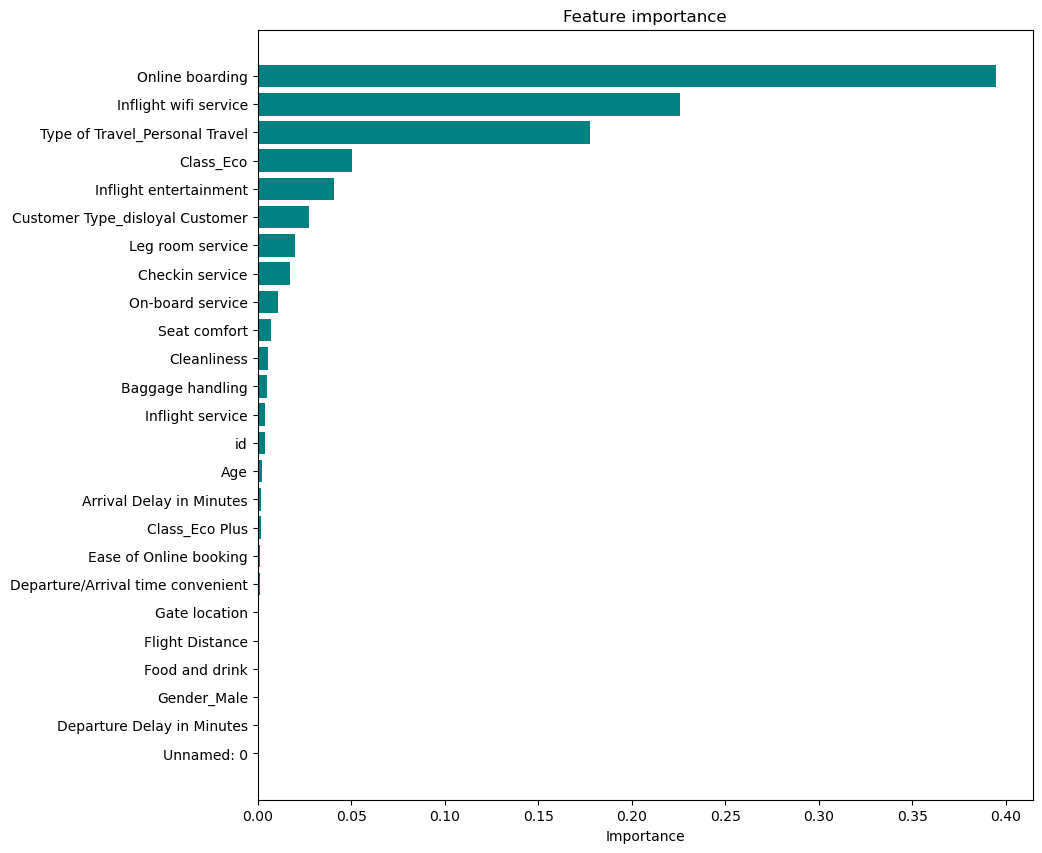

In [55]:
# we will also visualise the most important features that influence the customer satisfaction
feature_imporantce = model.feature_importances_
sorted_index = np.argsort(feature_imporantce)
plt.figure(figsize = (10,10))
plt.barh(X_train.columns[sorted_index], feature_imporantce[sorted_index], color = 'Teal')
plt.xlabel("Importance")
plt.title("Feature importance")
plt.show()